In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('grades.csv')

# Display the first few rows of the dataset
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [3]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
# Create a composite grade score
df['composite_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Display the first few rows of the dataset
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   composite_score  
0        72.666667  
1        82.333333  
2        92.666667  
3        49.333333  
4        76.333333  


In [5]:
df = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)

# Select features and target variable
X = df.drop(columns=['math score', 'reading score', 'writing score', 'composite_score'])
y = df['composite_score']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 179.60234233623535
R-squared: 0.1621718576315524


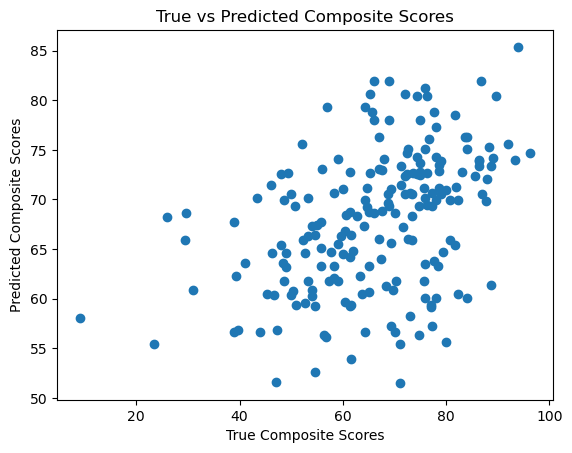

In [9]:
# Plot the true vs predicted grades
plt.scatter(y_test, y_pred)
plt.xlabel('True Composite Scores')
plt.ylabel('Predicted Composite Scores')
plt.title('True vs Predicted Composite Scores')
plt.show()

In [11]:
def predict_new_data(new_data, model, X_train_columns):
    """
    Predicts the grade for new data using the provided model.
    
    Parameters:
    new_data (pd.DataFrame): A DataFrame containing the new data to predict.
    model: Trained model.
    X_train_columns: Columns of the training data.
    
    Returns:
    np.array: Predicted grades.
    """
    # Convert categorical variables to dummy variables
    new_data = pd.get_dummies(new_data, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)
    
    # Ensure all required columns are present in the new data
    for col in X_train_columns:
        if col not in new_data.columns:
            new_data[col] = 0
    
    # Reorder columns to match training data
    new_data = new_data[X_train_columns]
    
    # Predict using the provided model
    predictions = model.predict(new_data)
    
    return predictions


In [12]:
# Sample new data
new_data = pd.DataFrame({
    'gender': ['female', 'male'],
    'race/ethnicity': ['group B', 'group C'],
    'parental level of education': ["bachelor's degree", 'some college'],
    'lunch': ['standard', 'standard'],
    'test preparation course': ['none', 'completed'],
    'math score': [72, 69],
    'reading score': [72, 90],
    'writing score': [74, 88]
})

# Predict grades for the new data
predicted_grades = predict_new_data(new_data, model, X_train.columns)

# Display the predictions
print(predicted_grades)


[60.39718311 64.24685789]
